In [7]:
import scipy.io
import os
import numpy as np
from tqdm import tqdm
import neurokit2 as nk
import matplotlib.pyplot as plt

In [2]:
main_directory = r'C:\Users\Alex\Downloads\datasets\training\data'
total_files = sum(len(files) for _, _, files in os.walk(main_directory))
progress_bar = tqdm(total = total_files, desc = "Data is loading...")
loaded_data = {}

for root, dirs, files in os.walk(main_directory):
    for filename in files:
        if filename.endswith('.mat') or filename.endswith('.hea'):
            file_path = os.path.join(root, filename)
            if filename.endswith('.mat'):
                data = scipy.io.loadmat(file_path)
            elif filename.endswith('.hea'):
                with open(file_path, 'r') as f:
                    data = f.read()
            loaded_data[file_path] = data
        progress_bar.update(1)
progress_bar.close()

Data is loading...: 100%|██████████| 41370/41370 [02:37<00:00, 262.34it/s]


In [3]:
for i, key in enumerate(loaded_data.keys()):
    if i >= 100:
        break
    print(key)

C:\Users\Alex\Downloads\datasets\training\data\cpsc_2018\g1\A0001.hea
C:\Users\Alex\Downloads\datasets\training\data\cpsc_2018\g1\A0001.mat
C:\Users\Alex\Downloads\datasets\training\data\cpsc_2018\g1\A0002.hea
C:\Users\Alex\Downloads\datasets\training\data\cpsc_2018\g1\A0002.mat
C:\Users\Alex\Downloads\datasets\training\data\cpsc_2018\g1\A0003.hea
C:\Users\Alex\Downloads\datasets\training\data\cpsc_2018\g1\A0003.mat
C:\Users\Alex\Downloads\datasets\training\data\cpsc_2018\g1\A0004.hea
C:\Users\Alex\Downloads\datasets\training\data\cpsc_2018\g1\A0004.mat
C:\Users\Alex\Downloads\datasets\training\data\cpsc_2018\g1\A0005.hea
C:\Users\Alex\Downloads\datasets\training\data\cpsc_2018\g1\A0005.mat
C:\Users\Alex\Downloads\datasets\training\data\cpsc_2018\g1\A0006.hea
C:\Users\Alex\Downloads\datasets\training\data\cpsc_2018\g1\A0006.mat
C:\Users\Alex\Downloads\datasets\training\data\cpsc_2018\g1\A0007.hea
C:\Users\Alex\Downloads\datasets\training\data\cpsc_2018\g1\A0007.mat
C:\Users\Alex\Downlo

In [4]:
selected_key = 'C:\\Users\\Alex\\Downloads\\datasets\\training\\data\\cpsc_2018\\g1\\A0001.hea'

if selected_key in loaded_data:
    print(f"Contents of {selected_key}: \n")
    print(loaded_data[selected_key])
else: print(f"Selected key {selected_key} does not exist.")

Contents of C:\Users\Alex\Downloads\datasets\training\data\cpsc_2018\g1\A0001.hea: 

A0001 12 500 7500
A0001.mat 16x1+24 1000.0(0)/mV 16 0 28 -1716 0 I
A0001.mat 16x1+24 1000.0(0)/mV 16 0 7 2029 0 II
A0001.mat 16x1+24 1000.0(0)/mV 16 0 -21 3745 0 III
A0001.mat 16x1+24 1000.0(0)/mV 16 0 -17 3680 0 aVR
A0001.mat 16x1+24 1000.0(0)/mV 16 0 24 -2664 0 aVL
A0001.mat 16x1+24 1000.0(0)/mV 16 0 -7 -1499 0 aVF
A0001.mat 16x1+24 1000.0(0)/mV 16 0 -290 390 0 V1
A0001.mat 16x1+24 1000.0(0)/mV 16 0 -204 157 0 V2
A0001.mat 16x1+24 1000.0(0)/mV 16 0 -96 -2555 0 V3
A0001.mat 16x1+24 1000.0(0)/mV 16 0 -112 49 0 V4
A0001.mat 16x1+24 1000.0(0)/mV 16 0 -596 -321 0 V5
A0001.mat 16x1+24 1000.0(0)/mV 16 0 -16 -3112 0 V6
# Age: 74
# Sex: Male
# Dx: 59118001
# Rx: Unknown
# Hx: Unknown
# Sx: Unknown



In [5]:
selected_key2 = 'C:\\Users\\Alex\\Downloads\\datasets\\training\\data\\cpsc_2018\\g1\\A0001.mat'
print(loaded_data[selected_key2])

{'val': array([[  28,   39,   45, ...,  258,  259,  259],
       [   7,   11,   15, ...,  248,  249,  250],
       [ -21,  -28,  -30, ...,  -10,  -10,   -9],
       ...,
       [-112, -110, -108, ...,  194,  194,  195],
       [-596, -590, -582, ...,  307,  307,  307],
       [ -16,   -7,    2, ...,  213,  214,  214]], dtype=int16)}


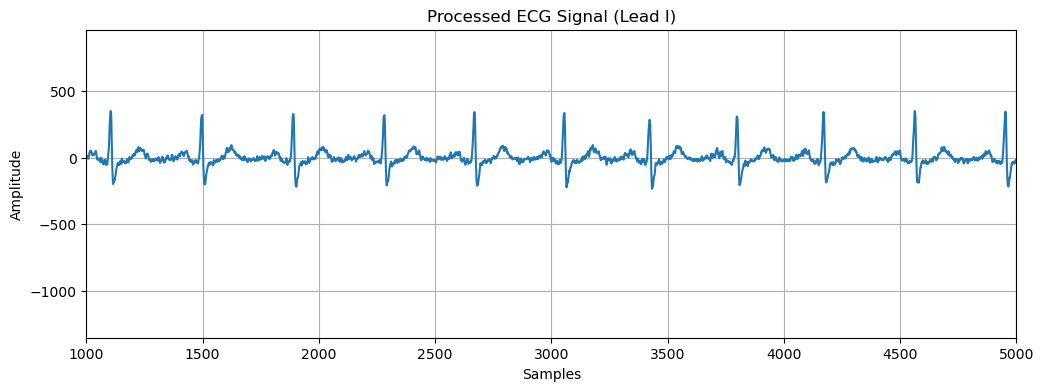

In [12]:
mat_data = loaded_data['C:\\Users\\Alex\\Downloads\\datasets\\training\\data\\cpsc_2018\\g1\\A0002.mat']
ecg_signal = mat_data['val'].flatten()
ecg_signal_processed = ecg_signal[~np.isnan(ecg_signal)]
ecg_processed = nk.ecg_process(ecg_signal_processed)
lead_name = "ECG_Raw" 

plt.figure(figsize=(12, 4))
plt.plot(ecg_processed[0][lead_name])  
plt.title("Processed ECG Signal (Lead I)")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(1000, 5000)
plt.show()